# Check versions

In [1]:
import bokeh as bk

float(bk.__version__[:4]) >= 0.12

True

In [2]:
import matplotlib as mpl

float(mpl.__version__[:3]) >= 1.5

True

In [3]:
import seaborn as sns

float(sns.__version__[:3]) >= 0.6

True

In [4]:
import pandas as pd

float(pd.__version__[:4]) >= 0.18

True

In [5]:
import sklearn

float(sklearn.__version__[:4]) >= 0.17

True

In [6]:
import statsmodels.api as sm

float(sm.version.version[:3]) >= 0.6

True

In [7]:
import clusterpy as cl

float(cl.__version__[:3]) >= 1.0

ClusterPy: Library of spatially constrained clustering algorithms


True

In [8]:
import fiona

float(fiona.__version__[:3]) >= 1.7

True

In [9]:
import geopandas as gpd

float(gpd.__version__[:3]) >= 0.2

True

In [10]:
import pysal as ps

float(ps.version[:4]) >= 1.11

True

In [11]:
import qgrid
import xlrd
import xlsxwriter
import rasterio

# Some extra modules to check

In [12]:
import altair

print(altair.__version__)

1.0.0


In [13]:
import cartopy

print(cartopy.__version__)

0.14.2


In [14]:
import dask

print(dask.__version__)

0.11.0


In [15]:
import folium

print(folium.__version__)

0.2.1


In [16]:
import iris

print(iris.__version__)

1.10.0


In [17]:
import matplotlib

print(matplotlib.__version__)

1.5.3


In [18]:
import netCDF4

print(netCDF4.__version__)

1.2.4


In [19]:
import numpy

print(numpy.__version__)

1.11.1


In [20]:
import pandas

pandas.__version__

u'0.18.1'

In [21]:
import shapefile

print(shapefile.__version__)

1.2.3


In [22]:
import rasterio

print(rasterio.__version__)

0.36.0


In [23]:
import scipy

print(scipy.__version__)

0.18.1


In [24]:
import xarray

print(xarray.__version__)

0.8.2


In [25]:
import cmocean
import mplleaflet

# Data test

In [26]:
shp = ps.examples.get_path('columbus.shp')

db = gpd.read_file(shp)

db.head()

,AREA,COLUMBUS_,COLUMBUS_I,CP,CRIME,DISCBD,EW,HOVAL,INC,NEIG,...,NSA,NSB,OPEN,PERIMETER,PLUMB,POLYID,THOUS,X,Y,geometry
0,0.309441,2,5,0.0,15.725980,5.03,1.0,80.467003,19.531,5,...,1.0,1.0,2.850747,2.440629,0.217155,1,1000.0,38.799999,44.070000,"POLYGON ((8.624129295349121 14.23698043823242,..."
1,0.259329,3,1,0.0,18.801754,4.27,0.0,44.567001,21.232,1,...,1.0,1.0,5.296720,2.236939,0.320581,2,1000.0,35.619999,42.380001,"POLYGON ((8.252790451049805 14.23694038391113,..."
2,0.192468,4,6,0.0,30.626781,3.89,1.0,26.350000,15.956,6,...,1.0,1.0,4.534649,2.187547,0.374404,3,1000.0,39.820000,41.180000,"POLYGON ((8.653305053710938 14.00809001922607,..."
3,0.083841,5,2,0.0,32.387760,3.70,0.0,33.200001,4.477,2,...,1.0,1.0,0.394427,1.427635,1.186944,4,1000.0,36.500000,40.520000,"POLYGON ((8.459499359130859 13.82034969329834,..."
4,0.488888,6,7,0.0,50.731510,2.83,1.0,23.225000,11.252,7,...,1.0,1.0,0.405664,2.997133,0.624596,5,1000.0,40.009998,38.000000,"POLYGON ((8.685274124145508 13.63951969146729,..."


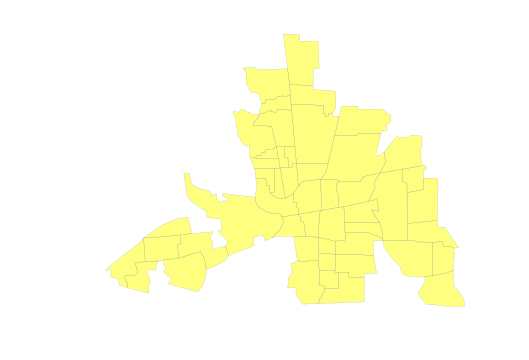

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
f, ax = plt.subplots(1)
for poly in db['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='yellow', edgecolor='grey', linewidth=0.1)
ax.set_axis_off()

In [28]:
db.crs['init'] = 'epsg:26918'

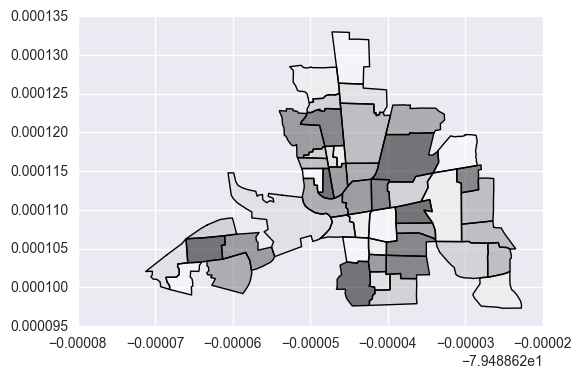

In [29]:
db_wgs84 = db.to_crs(epsg=4326)

db_wgs84.plot()

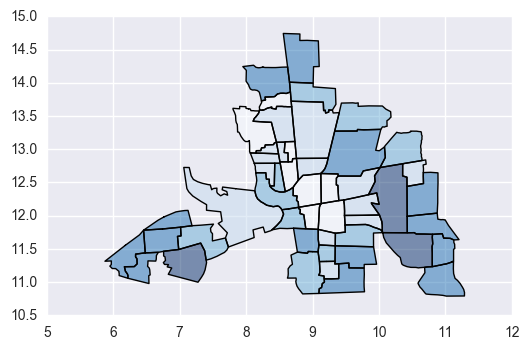

In [30]:
db.plot(column='INC', scheme='fisher_jenks', cmap=plt.matplotlib.cm.Blues)

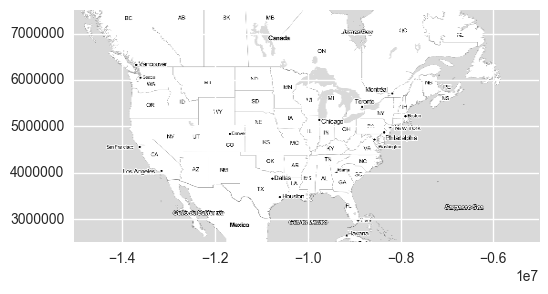

In [31]:
import numpy as np
import contextily as ctx

tl = ctx.tile_providers.ST_TONER_LITE

db = gpd.read_file(ps.examples.get_path('us48.shp'))
db.crs = {'init': 'epsg:4326'}
w, s, e, n = db.to_crs(epsg=3857).unary_union.bounds
dbp = db.to_crs(epsg=3857)
# Download raster
_ = ctx.bounds2raster(w, s, e, n, 4, 'us.tif', url=tl)
# Load up and plot
source = rasterio.open('us.tif', 'r')
red = source.read(1)
green = source.read(2)
blue = source.read(3)
pix = np.dstack((red, green, blue))
bounds = (source.bounds.left, source.bounds.right, \
          source.bounds.bottom, source.bounds.top)
f = plt.figure(figsize=(6, 6))
ax = plt.imshow(pix, extent=bounds)

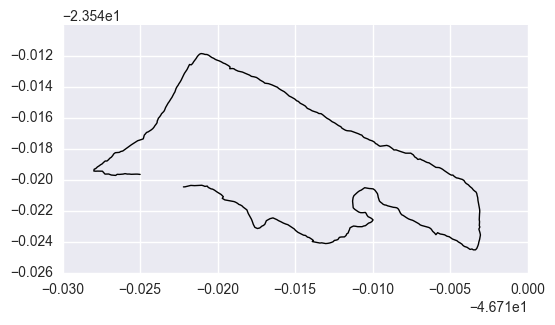

In [32]:
%matplotlib inline

import os
import geopandas as gpd

fname = os.path.join('data', '2013-04-29-Running.geojson')

df = gpd.read_file(fname)
ax = df.plot()

In [33]:
from ctd import DataFrame

fname = os.path.join('data', 'CTD_001.cnv.gz')

cast = DataFrame.from_cnv(fname, compression='gzip')

cast.head()

,scan,timeS,t090C,t190C,c0S/m,c1S/m,sbeox0V,par,spar,ph,...,longitude,pumps,pla,sbeox0PS,sbeox0Mm/Kg,dz/dtM,accM,flSP,xmiss,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
2.810,1.0,0.000,24.2158,24.2132,5.527058,5.526362,2.8107,1.000000e-12,11.761,-2.332,...,-47.452167,True,24.221,71.49588,147.595,0.000,0.00,0.11111,96.8657,False
2.846,2.0,0.042,24.2158,24.2132,5.527065,5.526352,2.8120,1.000000e-12,13.721,-2.336,...,-47.452167,True,24.221,71.53789,147.682,0.878,21.08,0.10867,96.8657,False
2.810,3.0,0.083,24.2156,24.2131,5.527060,5.526333,2.8120,1.000000e-12,11.761,-2.336,...,-47.452167,True,24.221,71.53759,147.682,-0.878,-42.16,0.10623,96.8657,False
2.744,4.0,0.125,24.2156,24.2132,5.527091,5.526339,2.8120,1.000000e-12,13.721,-2.336,...,-47.452167,True,24.221,71.53702,147.680,-1.581,-16.87,0.10745,96.8657,False
2.707,5.0,0.167,24.2158,24.2134,5.527052,5.526343,2.8132,1.000000e-12,13.721,-2.332,...,-47.452167,True,24.221,71.57837,147.766,-0.878,16.87,0.11111,96.9189,False
